## Notebook to unified BFE coefficients computed with AGAMA, EXP, and  -> GAMEXP

### Content: 

- Reads GC+23 coefficients
- Reads Vasiliev coefficients
- Reads GC+23 EXP coefficients
- Reads Lillengeen EXP coefficients

TODO: 
- Read nmax and lmax from Agama's potential files 

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pyEXP
import EXPtools
import gala
import bfe
#import agama

In [2]:
## GALA coefficients

In [3]:
# Load Expansions 

def load_gc23_exp(mwlmc, n_init, n_final, host=False, sat=False,): 
    path_to_exp = "../../data/expansion/GC23_SCF/{}_1e7/".format(mwlmc)
    host_path = "BFE_{}_grav_MO3_simple_1e7_COM_n20_l20_debris_test_host_snap_".format(mwlmc)
    sat_path = "BFE_{}_grav_MO3_simple_1e7_COM_n20_l20_debris_test_sat_snap_".format(mwlmc)

    
    #host_path = "BFE_{}_grav_MO3_simple_1e7_COM_n20_l20_host_snap_".format(mwlmc)
    #sat_path = "BFE_{}_grav_MO3_simple_1e7_COM_n20_l20_sat_snap_".format(mwlmc)

    nsnaps = n_final - n_init
    
    coefficients = []
    exp_length = []
    exp_param = []
    com = []
    
    if host == True:
        host_coeff = np.zeros((nsnaps, 5, 21, 21, 21))
        host_rcom = np.zeros((nsnaps, 3))
        for i in range(n_init, n_final):
            print('snap {:03d}'.format(i))

            host_coeff[i-n_init], exp_host_length, exp_host_params, host_rcom[i-n_init] = bfe.ios.read_coefficients(path_to_exp
                                                                                                       + host_path
                                                                                                       + "{:03d}".format(i))
        coefficients.append(host_coeff)
        exp_length.append(exp_host_length)
        exp_param.append(exp_host_params)
        com.append(host_rcom)
        
    if sat == True:
        sat_coeff = np.zeros((nsnaps, 3, 21, 21, 21))
        sat_rcom = np.zeros((nsnaps, 3))
        
        for i in range(n_init, n_final):
            sat_coeff[i-n_init], exp_sat_length, exp_sat_params, sat_rcom[i-n_init] = bfe.ios.read_coefficients(path_to_exp
                                                                                                       + sat_path
                                                                                                       + "{:03d}".format(i))
        coefficients.append(sat_coeff)
        exp_length.append(exp_sat_length)
        exp_param.append(exp_sat_params)
        com.append(sat_rcom)
        
    
        
    return coefficients, exp_length, exp_param, com

In [4]:
mwlmc5_coeff, mwmlc5_exp_length, mwlmc5_exp_params, mwlmc5_rcom = load_gc23_exp('MWLMC5', 0, 399, True, False);

snap 000
<KeysViewHDF5 ['G', 'Snlm', 'Tnlm', 'lmax', 'mmax', 'nmax', 'pmass', 'rcom', 'rs', 'var_STnlm', 'var_Snlm', 'var_Tnlm']>
* Loading coefficients
snap 001
<KeysViewHDF5 ['G', 'Snlm', 'Tnlm', 'lmax', 'mmax', 'nmax', 'pmass', 'rcom', 'rs', 'var_STnlm', 'var_Snlm', 'var_Tnlm']>
* Loading coefficients
snap 002
<KeysViewHDF5 ['G', 'Snlm', 'Tnlm', 'lmax', 'mmax', 'nmax', 'pmass', 'rcom', 'rs', 'var_STnlm', 'var_Snlm', 'var_Tnlm']>
* Loading coefficients
snap 003
<KeysViewHDF5 ['G', 'Snlm', 'Tnlm', 'lmax', 'mmax', 'nmax', 'pmass', 'rcom', 'rs', 'var_STnlm', 'var_Snlm', 'var_Tnlm']>
* Loading coefficients
snap 004
<KeysViewHDF5 ['G', 'Snlm', 'Tnlm', 'lmax', 'mmax', 'nmax', 'pmass', 'rcom', 'rs', 'var_STnlm', 'var_Snlm', 'var_Tnlm']>
* Loading coefficients
snap 005
<KeysViewHDF5 ['G', 'Snlm', 'Tnlm', 'lmax', 'mmax', 'nmax', 'pmass', 'rcom', 'rs', 'var_STnlm', 'var_Snlm', 'var_Tnlm']>
* Loading coefficients
snap 006
<KeysViewHDF5 ['G', 'Snlm', 'Tnlm', 'lmax', 'mmax', 'nmax', 'pmass', 'rco

snap 058
<KeysViewHDF5 ['G', 'Snlm', 'Tnlm', 'lmax', 'mmax', 'nmax', 'pmass', 'rcom', 'rs', 'var_STnlm', 'var_Snlm', 'var_Tnlm']>
* Loading coefficients
snap 059
<KeysViewHDF5 ['G', 'Snlm', 'Tnlm', 'lmax', 'mmax', 'nmax', 'pmass', 'rcom', 'rs', 'var_STnlm', 'var_Snlm', 'var_Tnlm']>
* Loading coefficients
snap 060
<KeysViewHDF5 ['G', 'Snlm', 'Tnlm', 'lmax', 'mmax', 'nmax', 'pmass', 'rcom', 'rs', 'var_STnlm', 'var_Snlm', 'var_Tnlm']>
* Loading coefficients
snap 061
<KeysViewHDF5 ['G', 'Snlm', 'Tnlm', 'lmax', 'mmax', 'nmax', 'pmass', 'rcom', 'rs', 'var_STnlm', 'var_Snlm', 'var_Tnlm']>
* Loading coefficients
snap 062
<KeysViewHDF5 ['G', 'Snlm', 'Tnlm', 'lmax', 'mmax', 'nmax', 'pmass', 'rcom', 'rs', 'var_STnlm', 'var_Snlm', 'var_Tnlm']>
* Loading coefficients
snap 063
<KeysViewHDF5 ['G', 'Snlm', 'Tnlm', 'lmax', 'mmax', 'nmax', 'pmass', 'rcom', 'rs', 'var_STnlm', 'var_Snlm', 'var_Tnlm']>
* Loading coefficients
snap 064
<KeysViewHDF5 ['G', 'Snlm', 'Tnlm', 'lmax', 'mmax', 'nmax', 'pmass', 'rco

snap 117
<KeysViewHDF5 ['G', 'Snlm', 'Tnlm', 'lmax', 'mmax', 'nmax', 'pmass', 'rcom', 'rs', 'var_STnlm', 'var_Snlm', 'var_Tnlm']>
* Loading coefficients
snap 118
<KeysViewHDF5 ['G', 'Snlm', 'Tnlm', 'lmax', 'mmax', 'nmax', 'pmass', 'rcom', 'rs', 'var_STnlm', 'var_Snlm', 'var_Tnlm']>
* Loading coefficients
snap 119
<KeysViewHDF5 ['G', 'Snlm', 'Tnlm', 'lmax', 'mmax', 'nmax', 'pmass', 'rcom', 'rs', 'var_STnlm', 'var_Snlm', 'var_Tnlm']>
* Loading coefficients
snap 120
<KeysViewHDF5 ['G', 'Snlm', 'Tnlm', 'lmax', 'mmax', 'nmax', 'pmass', 'rcom', 'rs', 'var_STnlm', 'var_Snlm', 'var_Tnlm']>
* Loading coefficients
snap 121
<KeysViewHDF5 ['G', 'Snlm', 'Tnlm', 'lmax', 'mmax', 'nmax', 'pmass', 'rcom', 'rs', 'var_STnlm', 'var_Snlm', 'var_Tnlm']>
* Loading coefficients
snap 122
<KeysViewHDF5 ['G', 'Snlm', 'Tnlm', 'lmax', 'mmax', 'nmax', 'pmass', 'rcom', 'rs', 'var_STnlm', 'var_Snlm', 'var_Tnlm']>
* Loading coefficients
snap 123
<KeysViewHDF5 ['G', 'Snlm', 'Tnlm', 'lmax', 'mmax', 'nmax', 'pmass', 'rco

snap 172
<KeysViewHDF5 ['G', 'Snlm', 'Tnlm', 'lmax', 'mmax', 'nmax', 'pmass', 'rcom', 'rs', 'var_STnlm', 'var_Snlm', 'var_Tnlm']>
* Loading coefficients
snap 173
<KeysViewHDF5 ['G', 'Snlm', 'Tnlm', 'lmax', 'mmax', 'nmax', 'pmass', 'rcom', 'rs', 'var_STnlm', 'var_Snlm', 'var_Tnlm']>
* Loading coefficients
snap 174
<KeysViewHDF5 ['G', 'Snlm', 'Tnlm', 'lmax', 'mmax', 'nmax', 'pmass', 'rcom', 'rs', 'var_STnlm', 'var_Snlm', 'var_Tnlm']>
* Loading coefficients
snap 175
<KeysViewHDF5 ['G', 'Snlm', 'Tnlm', 'lmax', 'mmax', 'nmax', 'pmass', 'rcom', 'rs', 'var_STnlm', 'var_Snlm', 'var_Tnlm']>
* Loading coefficients
snap 176
<KeysViewHDF5 ['G', 'Snlm', 'Tnlm', 'lmax', 'mmax', 'nmax', 'pmass', 'rcom', 'rs', 'var_STnlm', 'var_Snlm', 'var_Tnlm']>
* Loading coefficients
snap 177
<KeysViewHDF5 ['G', 'Snlm', 'Tnlm', 'lmax', 'mmax', 'nmax', 'pmass', 'rcom', 'rs', 'var_STnlm', 'var_Snlm', 'var_Tnlm']>
* Loading coefficients
snap 178
<KeysViewHDF5 ['G', 'Snlm', 'Tnlm', 'lmax', 'mmax', 'nmax', 'pmass', 'rco

snap 252
<KeysViewHDF5 ['G', 'Snlm', 'Tnlm', 'lmax', 'mmax', 'nmax', 'pmass', 'rcom', 'rs', 'var_STnlm', 'var_Snlm', 'var_Tnlm']>
* Loading coefficients
snap 253
<KeysViewHDF5 ['G', 'Snlm', 'Tnlm', 'lmax', 'mmax', 'nmax', 'pmass', 'rcom', 'rs', 'var_STnlm', 'var_Snlm', 'var_Tnlm']>
* Loading coefficients
snap 254
<KeysViewHDF5 ['G', 'Snlm', 'Tnlm', 'lmax', 'mmax', 'nmax', 'pmass', 'rcom', 'rs', 'var_STnlm', 'var_Snlm', 'var_Tnlm']>
* Loading coefficients
snap 255
<KeysViewHDF5 ['G', 'Snlm', 'Tnlm', 'lmax', 'mmax', 'nmax', 'pmass', 'rcom', 'rs', 'var_STnlm', 'var_Snlm', 'var_Tnlm']>
* Loading coefficients
snap 256
<KeysViewHDF5 ['G', 'Snlm', 'Tnlm', 'lmax', 'mmax', 'nmax', 'pmass', 'rcom', 'rs', 'var_STnlm', 'var_Snlm', 'var_Tnlm']>
* Loading coefficients
snap 257
<KeysViewHDF5 ['G', 'Snlm', 'Tnlm', 'lmax', 'mmax', 'nmax', 'pmass', 'rcom', 'rs', 'var_STnlm', 'var_Snlm', 'var_Tnlm']>
* Loading coefficients
snap 258
<KeysViewHDF5 ['G', 'Snlm', 'Tnlm', 'lmax', 'mmax', 'nmax', 'pmass', 'rco

snap 307
<KeysViewHDF5 ['G', 'Snlm', 'Tnlm', 'lmax', 'mmax', 'nmax', 'pmass', 'rcom', 'rs', 'var_STnlm', 'var_Snlm', 'var_Tnlm']>
* Loading coefficients
snap 308
<KeysViewHDF5 ['G', 'Snlm', 'Tnlm', 'lmax', 'mmax', 'nmax', 'pmass', 'rcom', 'rs', 'var_STnlm', 'var_Snlm', 'var_Tnlm']>
* Loading coefficients
snap 309
<KeysViewHDF5 ['G', 'Snlm', 'Tnlm', 'lmax', 'mmax', 'nmax', 'pmass', 'rcom', 'rs', 'var_STnlm', 'var_Snlm', 'var_Tnlm']>
* Loading coefficients
snap 310
<KeysViewHDF5 ['G', 'Snlm', 'Tnlm', 'lmax', 'mmax', 'nmax', 'pmass', 'rcom', 'rs', 'var_STnlm', 'var_Snlm', 'var_Tnlm']>
* Loading coefficients
snap 311
<KeysViewHDF5 ['G', 'Snlm', 'Tnlm', 'lmax', 'mmax', 'nmax', 'pmass', 'rcom', 'rs', 'var_STnlm', 'var_Snlm', 'var_Tnlm']>
* Loading coefficients
snap 312
<KeysViewHDF5 ['G', 'Snlm', 'Tnlm', 'lmax', 'mmax', 'nmax', 'pmass', 'rcom', 'rs', 'var_STnlm', 'var_Snlm', 'var_Tnlm']>
* Loading coefficients
snap 313
<KeysViewHDF5 ['G', 'Snlm', 'Tnlm', 'lmax', 'mmax', 'nmax', 'pmass', 'rco

<KeysViewHDF5 ['G', 'Snlm', 'Tnlm', 'lmax', 'mmax', 'nmax', 'pmass', 'rcom', 'rs', 'var_STnlm', 'var_Snlm', 'var_Tnlm']>
* Loading coefficients
snap 376
<KeysViewHDF5 ['G', 'Snlm', 'Tnlm', 'lmax', 'mmax', 'nmax', 'pmass', 'rcom', 'rs', 'var_STnlm', 'var_Snlm', 'var_Tnlm']>
* Loading coefficients
snap 377
<KeysViewHDF5 ['G', 'Snlm', 'Tnlm', 'lmax', 'mmax', 'nmax', 'pmass', 'rcom', 'rs', 'var_STnlm', 'var_Snlm', 'var_Tnlm']>
* Loading coefficients
snap 378
<KeysViewHDF5 ['G', 'Snlm', 'Tnlm', 'lmax', 'mmax', 'nmax', 'pmass', 'rcom', 'rs', 'var_STnlm', 'var_Snlm', 'var_Tnlm']>
* Loading coefficients
snap 379
<KeysViewHDF5 ['G', 'Snlm', 'Tnlm', 'lmax', 'mmax', 'nmax', 'pmass', 'rcom', 'rs', 'var_STnlm', 'var_Snlm', 'var_Tnlm']>
* Loading coefficients
snap 380
<KeysViewHDF5 ['G', 'Snlm', 'Tnlm', 'lmax', 'mmax', 'nmax', 'pmass', 'rcom', 'rs', 'var_STnlm', 'var_Snlm', 'var_Tnlm']>
* Loading coefficients
snap 381
<KeysViewHDF5 ['G', 'Snlm', 'Tnlm', 'lmax', 'mmax', 'nmax', 'pmass', 'rcom', 'rs',

In [5]:
np.shape(mwlmc5_coeff)

(1, 399, 5, 21, 21, 21)

In [6]:
Sjnlm_host = mwlmc5_coeff[0][:,0]
Tjnlm_host = mwlmc5_coeff[0][:,1]

In [7]:
Sjnlm_host.shape

(399, 21, 21, 21)

In [8]:
power = np.sqrt(np.sum(np.sum(Sjnlm_host**2 + Tjnlm_host**2, axis=1), axis=2))

In [9]:
tgc23 = np.arange(0, 399*0.02, 0.02)

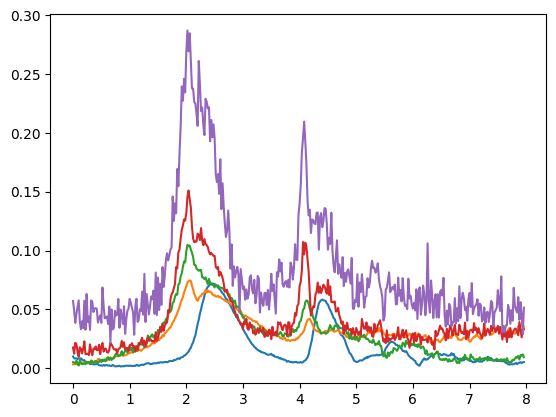

In [10]:
#plt.plot(power[:,0]/power[:,0])
plt.plot(tgc23, power[:,1]/power[0,0])
plt.plot(tgc23, power[:,2]/power[0,0])
plt.plot(tgc23, power[:,3]/power[0,0])
plt.plot(tgc23, power[:,4]/power[0,0])
plt.plot(tgc23, power[:,5]/power[0,0])

## AGAMA coefficients

## TODO:

- Read nmax, lmax from Agama potential files

## AGAMA reader

In [12]:
# 
# path to coeff

v23_L2M10_path = '../../data/expansion/vasiliev23/L2M10/'
v23_L2M11_path = '../../data/expansion/vasiliev23/L2M11/pot_bse/'
v23_L3M10_path = '../../data/expansion/vasiliev23/L3M10/pot_bse/'
v23_L3M11_path = '../../data/expansion/vasiliev23/L3M11/pot_bse/'

nmax = 20
lmax = 6
nsnaps = 177

Sjnlm_v23 = np.zeros((nsnaps, nmax+1, lmax+1, lmax+1))
Tjnlm_v23 = np.zeros((nsnaps, nmax+1, lmax+1, lmax+1))

for i in range(177):
    v23_L2M10_scf = np.loadtxt(v23_L2M10_path + 'mwhalo{:03d}.ini'.format(i), skiprows=10)
    Snlm, Tnlm = EXPtools.scf.agama_to_gala(v23_L2M10_scf, nmax=nmax, lmax=lmax)
    Sjnlm_v23[i] = Snlm
    Tjnlm_v23[i] = Tnlm

In [13]:
Sjnlm_v23.shape

(177, 21, 7, 7)

In [14]:
power_v23 = np.sqrt(np.sum(np.sum(Sjnlm_v23**2 + Tjnlm_v23**2, axis=1), axis=2))

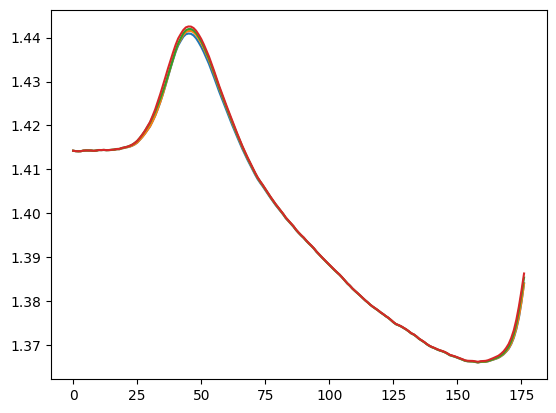

In [15]:
plt.plot(power_v23[:,1]/power_v23[0,0])
plt.plot(power_v23[:,2]/power_v23[0,0])
plt.plot(power_v23[:,3]/power_v23[0,0])
plt.plot(power_v23[:,4]/power_v23[0,0])

## GC23 EXP coefficients

In [16]:
GC23_exp_path = '../../data/expansion/GC23_exp/'
coeff_filename = 'MWLMC5_halov12.h5'


In [17]:
import os
os.chdir('../../data/expansion/GC23_exp/')

## TODO:

- Use EXPtool to make config file

In [18]:
# Define config params
mwconfig = """
id: sphereSL
parameters:
  numr: 500
  rmin: 0.01
  rmax: 600
  Lmax: 4
  nmax: 15
  scale: 40.85
  modelname: SLGrid.empirical.halo.isolate.mwlmc5v12
  cachename: .slgrid_sph_cache_halo_mwlmc5v12
"""

In [19]:
mwcoefs = pyEXP.coefs.Coefs.factory(coeff_filename)

In [20]:
mwbasis = pyEXP.basis.Basis.factory(mwconfig)

---- SLGridSph::ReadH5Cache: read basis cache <.slgrid_sph_cache_halo_mwlmc5v12.h5>


In [26]:
GC23_times = mwcoefs.Times()
GC23_power = mwcoefs.Power()

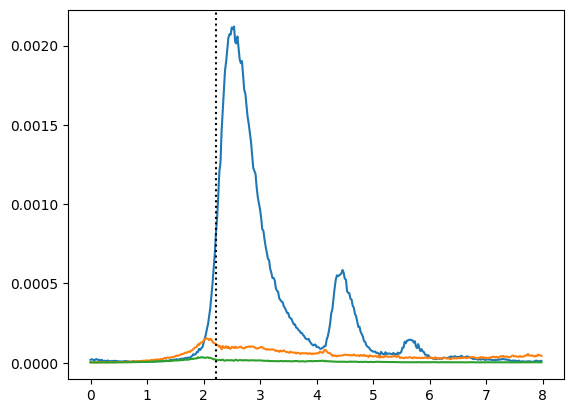

In [34]:
#plt.plot(GC23_times, GC23_power[:,0]/GC23_power[0,0])
plt.plot(GC23_times, GC23_power[:,1]/GC23_power[0,0])
plt.plot(GC23_times, GC23_power[:,2]/GC23_power[0,0])
plt.plot(GC23_times, GC23_power[:,3]/GC23_power[0,0])
plt.axvline(2.22, c='k', ls=':')

In [22]:
GC23_fields = EXPtools.visuals.slice_fields(mwbasis, mwcoefs, time=2.2, projection='YZ')

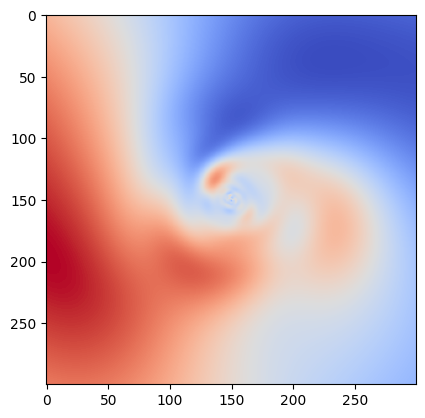

In [23]:
plt.imshow((GC23_fields[0] + GC23_fields[1]) / GC23_fields[0], cmap='coolwarm')